## <center>Khalifa University</center>
## <center>Computer Science Department
### <center>ENGR 202: Data Science and Artificial Intelligence- Fall 2024
# <center>Lab3: Data Collection and Data Analysis 
### Aim: Retrieve Data from different resources and  to analayse data using statistical tools.
### Objectives:		

* Read data from CSV and Json through an API
    
* Analyze data using statistical tools.    
    
* Analyze correlations between variables.
    

#### Risk Assessment: Low

The first step of Data analysis cycle is Data Collection. In this Lab we will retrieve data from different resources and apply some statistical tools to explore and understand the features. First is API and the second is CSV files.

### Task 1: Data from API: Introduction

In this task, you will read cars data from an API, extract certain data, and make some interpretations of the data using visualization tools you have learned in the previous lab. You will learn how to send a request access data through API and handle failure cases when an access request fails. The API data is in JSON format, one of the most common formats for API data. 

![img](https://wikis.ec.europa.eu/download/attachments/44165598/image_10.png?version=1&modificationDate=1651036868305&api=v2)


**API Request**: To access data through an API, you need to send a request to the API's server with specific parameters to obtain the intended data. The picture above shows that the API's URL consists of fixed and dynamic parts. The fixed part contains information about the API's server that is required to access it. All requests should involve that fixed part to successfully access the server. On the other hand, the dynamic part is the parameters you add to access a particular portion of the data on the API's server. 

To illustrate this idea, let's explore the URL structure of the car's API. The fixed part of the URL is:
```
https://freetestapi.com/api/v1/
```
One of the parameters of this API is called `cars`, which retrieves all cars  on the server. Hence, the URL to retrieve all cars  from that server will be:
```
https://freetestapi.com/api/v1/cars 
```
In order to send a request using Python, you need to install a library called `requests`. Run the following cell to install it on your device.

In [40]:
!pip install requests

Now, you can use the library to send a request to the server. Replace the string inside `get()` function with the correct URL to the server that retrieves all cars from the API.

In [41]:
import requests

response = requests.get('https://freetestapi.com/api/v1/cars')

Now, the response variable holds the request status, as does the data from the API. If you encounter a failure while accessing the API's server, you should not try to access the data from the response, as it will crash the software. Thus, you have to check the request status first and read the data only if the access status is successful. Run the following code to follow these procedures.

In [42]:
if response.status_code == 200: # Status 200 means successful accessing to the API's server
    cars_data =response.json() # This line to read the data. We use it as the data is in JSON format.
    
    print('Total number of cars :', len(cars_data))
    print()
    print(cars_data)

else:
    print(f"Failed to retrieve data: {response.status_code}") # In case of failure, display the request status error code. 

Total number of cars : 30

[{'id': 1, 'make': 'Toyota', 'model': 'Corolla', 'year': 2022, 'color': 'Silver', 'mileage': 20000, 'price': 25000, 'fuelType': 'Gasoline', 'transmission': 'Automatic', 'engine': '2.0L 4-cylinder', 'horsepower': 169, 'features': ['Bluetooth', 'Backup Camera', 'Keyless Entry'], 'owners': 1, 'image': 'https://fakeimg.pl/500x500/cccccc'}, {'id': 2, 'make': 'Honda', 'model': 'Civic', 'year': 2021, 'color': 'White', 'mileage': 18000, 'price': 22000, 'fuelType': 'Gasoline', 'transmission': 'CVT', 'engine': '1.5L 4-cylinder', 'horsepower': 158, 'features': ['Apple CarPlay', 'Android Auto', 'Lane Departure Warning'], 'owners': 2, 'image': 'https://fakeimg.pl/500x500/ffffff'}, {'id': 3, 'make': 'Ford', 'model': 'Mustang', 'year': 2020, 'color': 'Red', 'mileage': 15000, 'price': 35000, 'fuelType': 'Gasoline', 'transmission': 'Manual', 'engine': '5.0L V8', 'horsepower': 450, 'features': ['Leather Seats', 'Navigation System', 'Heated Seats'], 'owners': 1, 'image': 'https

Assume you only want to retrieve five cars. In this case, you can use an additional parameter called 'limit' with the intended value. In this case, the URL structure should be:
```
https://freetestapi.com/api/v1/cars?limit=5
```
**Q:** In the next cell, write a code that requests ten cars from the server and print the data as you did earlier, and print the total number of retrieved cars. 

In [43]:
# TODO: Write python code to send a request to the API's server with a proper URL format
res = requests.get('https://freetestapi.com/api/v1/cars?limit=5')
# TODO: Write an if-statement to check the request status
if res.status_code == 200:
    #TODO: In case of success, read the retrieved data.
    cars_data = res.json()
    #TODO: Print the total number of the retrieved cars.
    print('Total number of cars :', len(cars_data))
    print()
    print(cars_data)
#TODO: In case of failure, print the status code.
else:
    print(f'API request failed with status code: {res.status_code}')

    
    


Total number of cars : 5

[{'id': 1, 'make': 'Toyota', 'model': 'Corolla', 'year': 2022, 'color': 'Silver', 'mileage': 20000, 'price': 25000, 'fuelType': 'Gasoline', 'transmission': 'Automatic', 'engine': '2.0L 4-cylinder', 'horsepower': 169, 'features': ['Bluetooth', 'Backup Camera', 'Keyless Entry'], 'owners': 1, 'image': 'https://fakeimg.pl/500x500/cccccc'}, {'id': 2, 'make': 'Honda', 'model': 'Civic', 'year': 2021, 'color': 'White', 'mileage': 18000, 'price': 22000, 'fuelType': 'Gasoline', 'transmission': 'CVT', 'engine': '1.5L 4-cylinder', 'horsepower': 158, 'features': ['Apple CarPlay', 'Android Auto', 'Lane Departure Warning'], 'owners': 2, 'image': 'https://fakeimg.pl/500x500/ffffff'}, {'id': 3, 'make': 'Ford', 'model': 'Mustang', 'year': 2020, 'color': 'Red', 'mileage': 15000, 'price': 35000, 'fuelType': 'Gasoline', 'transmission': 'Manual', 'engine': '5.0L V8', 'horsepower': 450, 'features': ['Leather Seats', 'Navigation System', 'Heated Seats'], 'owners': 1, 'image': 'https:

#### Handle JSON Data
To get familiar with JSON data, let's do some processes on the car's data. JSON format is close to the dictionary format that you are familiar with. As you saw earlier, we can retrieve all cars at once. Hence, the data will come as a list of cars. To select a certain car, you can simply use the index to pick the corresponding car.

In [44]:
request_url='https://freetestapi.com/api/v1/cars'
response = requests.get(request_url)

if response.status_code == 200:
    cars_data =response.json() 
else:
    print(f"Failed to retrieve data: {response.status_code}") # In case of failure, display the request status error code. 

# Select the car at index 3.

print(cars_data[3])

{'id': 4, 'make': 'Chevrolet', 'model': 'Equinox', 'year': 2019, 'color': 'Blue', 'mileage': 30000, 'price': 20000, 'fuelType': 'Gasoline', 'transmission': 'Automatic', 'engine': '1.5L 4-cylinder', 'horsepower': 170, 'features': ['Rearview Camera', 'Blind-Spot Monitoring', 'Wi-Fi Hotspot'], 'owners': 2, 'image': 'https://fakeimg.pl/500x500/0000ff'}


As you can see in the output, the car has various parameters. Check the below tables to know all available parameters:

| id      | make   | model  | year   | color  | mileage |
|---------|--------|--------|--------|--------|---------|
| number  | string | string | number | string | number  |

| price   | fuelType | transmission | engine | horsepower | features |
|---------|----------|--------------|--------|------------|----------|
| number  | string   | string       | string | number     | array    |

| owners  | image   |
|---------|---------|
| number  | string  |



In [45]:
print('The car manufacturer is: ', cars_data[3]['make'])

print()

print('The car model is: ', cars_data[3]['model'])

print()

print('The car owners are: ', cars_data[3]['owners'])

The car manufacturer is:  Chevrolet

The car model is:  Equinox

The car owners are:  2


#### Practice Exercise

As you are familiar with the API and JSON format, let's test what you learned in this exercise.  You will use a different API to extract data for movies. Each movie has a rating out of 10 and its genre (There can be more than one). As a data scientist, you want to know what type of movies your users give a high rating so that you can increase the number of these movies on your website. To do this analysis,  Complete the code in the next steps to achieve this goal.
This exercise will test your capability to understand an existing code and appropriately modify it.  you should follow the following plan:

**Q1**: Read all movies from the API and print successfuly tretrieved or failure message.
The API link to extract all movies is `https://freetestapi.com/api/v1/movies`.

**If your code is correct, the cell should print --> ***Retrieved successfuly***.**

In [46]:
#Ans 1
import requests

# Add the API's link to access all movies.
request_url = 'https://freetestapi.com/api/v1/movies'

# Step 1: Send a request to retrieve all movies
request_response = requests.get(request_url)

# TODO: Check the request status
if request_response.status_code == 200:
    movies_data = request_response.json()
    print("Retrieved successfuly")
else:
    print(f"Failed to retrieve data: {request_response.status_code}")


Retrieved successfuly


In [47]:
movies_data

[{'id': 1,
  'title': 'The Shawshank Redemption',
  'year': 1994,
  'genre': ['Drama'],
  'rating': 9.3,
  'director': 'Frank Darabont',
  'actors': ['Tim Robbins', 'Morgan Freeman'],
  'plot': 'Two imprisoned men bond over several years, finding solace and eventual redemption through acts of common decency.',
  'poster': 'https://fakeimg.pl/220x310/ff0000',
  'trailer': 'https://example.com/shawshank_redemption_trailer.mp4',
  'runtime': 142,
  'awards': 'Nominated for 7 Oscars',
  'country': 'USA',
  'language': 'English',
  'boxOffice': '$28.3 million',
  'production': 'Columbia Pictures',
  'website': 'http://www.warnerbros.com/movies/shawshank-redemption'},
 {'id': 2,
  'title': 'The Godfather',
  'year': 1972,
  'genre': ['Crime', 'Drama'],
  'rating': 9.2,
  'director': 'Francis Ford Coppola',
  'actors': ['Marlon Brando', 'Al Pacino', 'James Caan'],
  'plot': 'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
 

**Q2**: Iterate over the movies and use a proper data structure that helps in the analysis process. In this case, a dictionary is the most suitable data structure to hold each genre with its assigned ratings.

**Expected output should be:** Modify the code accordingly.
```
{'Drama': [9.3, 9.2, 9, 8.9, 8.8, 8.9, 8.6, 8.8, 8.5, 8.7, 8.6, 8.5, 8.6, 8.5, 7.8, 8.5], 'Crime': [9.2, 9, 8.9, 8.6, 8.5], 'Action': [9, 8.8, 8.7, 8.4, 8.5, 8], 'Romance': [8.8], 'Adventure': [8.8, 8.9, 8.6, 8.5, 8.7, 8, 8.5], 'Sci-Fi': [8.8, 8.7, 8.6, 8.5, 8], 'Fantasy': [8.9, 8.7], 'Thriller': [8.4, 8.6, 8.5], 'War': [8.6, 7.8], 'Mystery': [8.5], 'History': [7.8], 'Animation': [8.5]}
```

In [48]:

# Ans 2: Iterate over all movies
# The dictionary keys should be all possible genres, and the values should be a list of all ratings given to each genre.

movies_genres_dict = dict()

for movie_data in movies_data:
    # Read the movie rating
    movie_rating = movie_data['rating']
    # Read the movie genres. Note that it could be more than one, you have to iterate over them
    movie_genres = movie_data['genre']
    for genre in movie_genres:
        if genre in movies_genres_dict: # If the genre is found before, just add the movie rating to its list
            movies_genres_dict[genre].append(movie_rating)
        else: # Otherwise, create a list with the current movie rating
            movies_genres_dict[genre]= [movie_rating]

print('All genres and their ratings:\n\n', movies_genres_dict)

All genres and their ratings:

 {'Drama': [9.3, 9.2, 9, 8.9, 8.8, 8.9, 8.6, 8.8, 8.5, 8.7, 8.6, 8.5, 8.6, 8.5, 7.8, 8.5], 'Crime': [9.2, 9, 8.9, 8.6, 8.5], 'Action': [9, 8.8, 8.7, 8.4, 8.5, 8], 'Romance': [8.8], 'Adventure': [8.8, 8.9, 8.6, 8.5, 8.7, 8, 8.5], 'Sci-Fi': [8.8, 8.7, 8.6, 8.5, 8], 'Fantasy': [8.9, 8.7], 'Thriller': [8.4, 8.6, 8.5], 'War': [8.6, 7.8], 'Mystery': [8.5], 'History': [7.8], 'Animation': [8.5]}



Use a histogram to plot each genre with its ratings.


Run below code to display histogram for each genre.

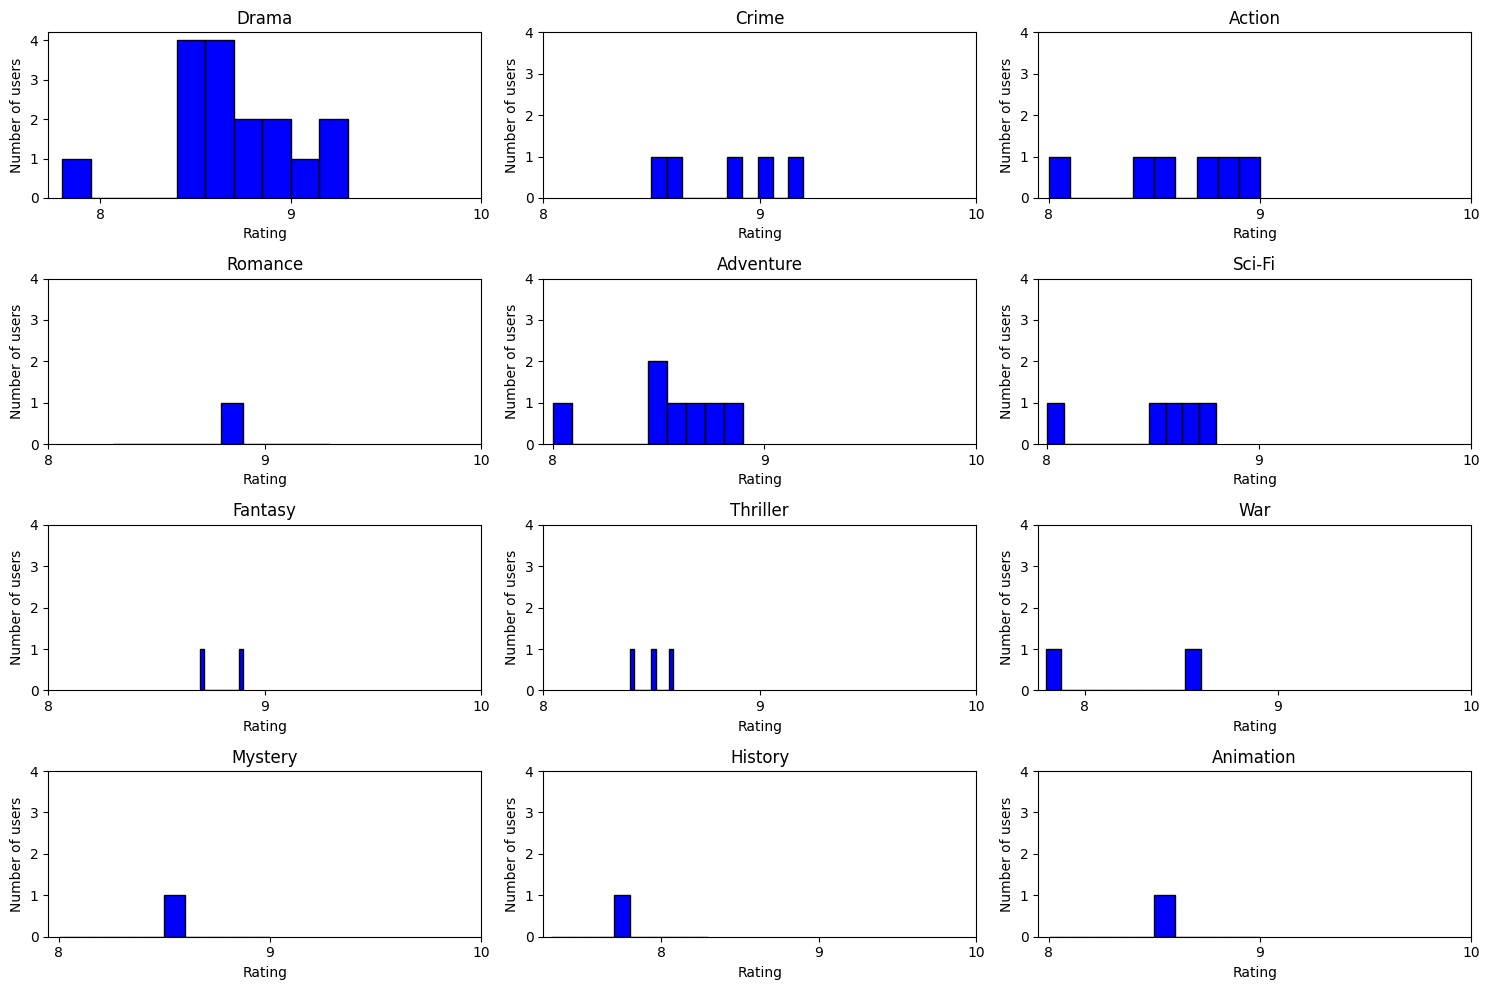

In [49]:
import matplotlib.pyplot as plt

total_figurs = len(movies_genres_dict) # Total number of genres
plt.figure(figsize=(15, 10))

for idx, genre in enumerate(movies_genres_dict.keys()):
    plt.subplot(int(total_figurs/3),3 ,idx+1)
    plt.title(genre)
    plt.xlabel('Rating')
    plt.ylabel('Number of users')
    plt.hist(movies_genres_dict[genre], color='blue', edgecolor='black')
    plt.xticks(range(8, 11))
    plt.yticks(range(0, 5))
plt.tight_layout()

**Q3** From the histograms, which movie type do your users like the most?

Drama

### Task 2: Data from CSV file: Introduction
As a **biomedical Engieer researcher**, you have been given a dataset "diabetes.csv. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.  In particular, all patients here are females at least 21 years old. The datasets consists of several medical predictor variables and one target variable, Outcome which is whether the patient is diagnosed with diabetes (1) or not (0). Predictor variables includes:

* **Pregnancies**: Number of pregnancies the patient has had
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)

Your work will invlove the follwoing reading data, conduct exploratory data analysis, use statistical analysis and data visualization. In addition to investigating the correlation between data in the dataset. 

The main purpose of studying the correlation is to determine robust metrics in the dataset that could potentially help to identify whether or not the patients have diabetes. Column `Outcome` contains either `1`, as an indication of having diabetes, or `0`, as an indication of healthy patient. Given details of the metrics/features (columns) included in the dataset, you will measure the correlation between the features, visualize the correlation, and perform some analysis about the outcome. 

You may need to use libraries and packages such as pandas for reading data and statistics functions, matplotlib for data visualization and seaborn for visulizing the correlation among features.


### Lab Task:
Follow the steps below and answer all questions.

**Q1. Import libraries**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

**Q2. Read dataset  diabetes.csv**

In [51]:
diabetes=pd.read_csv('diabetes.csv')

**Q3. Show head and tail of your data set**

In [52]:
print(diabetes.head())
print(diabetes.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

**Q4. Show all coloums' names**

In [53]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Q5. How many rows do we have in our data set**

In [54]:
diabetes.shape[0]

768

 **Q6. Find the Maxium Glucose Level**

In [55]:
diabetes['Glucose'].max()

199

**Q7. Find the Minimum Glucose Level**

In [56]:
diabetes['Glucose'].min()

0

  **8. Find the mean of Glucose.** 

  Hint: Call `mean()` to compute the mean of a column.

In [57]:
diabetes['Glucose'].mean()

120.89453125

**9. Find the median of Glucose.**

Hint: Call `median()` to compute the median of a column.

In [58]:
diabetes['Glucose'].median()

117.0

**Q10. Find the variance of Glucose.**  

Hint: Call `var()` to compute the variance of a column.

In [59]:
diabetes['Glucose'].var()

1022.2483142519557

**Q11.Find the age and BMI of maximum Glucose patient.** 

In [60]:
age = diabetes[diabetes['Glucose'].max() == diabetes['Glucose']]['Age']
bmi = diabetes[diabetes['Glucose'].max() == diabetes['Glucose']]['BMI']
print('The age of the person with the highest glucose level is:', age.values[0])
print('The BMI of the person with the highest glucose level is:', bmi.values[0])

The age of the person with the highest glucose level is: 22
The BMI of the person with the highest glucose level is: 42.9


**Q12. Generating summery of diabetes statistics for all using the method `describe()`**

In [61]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Q13. Plot a histogram to show the frequency of people at each of 20 ranges (bins) of glucose level.**

Hint:
```python
plt.hist(column_data, bins=20, color='blue', edgecolor='black')

```

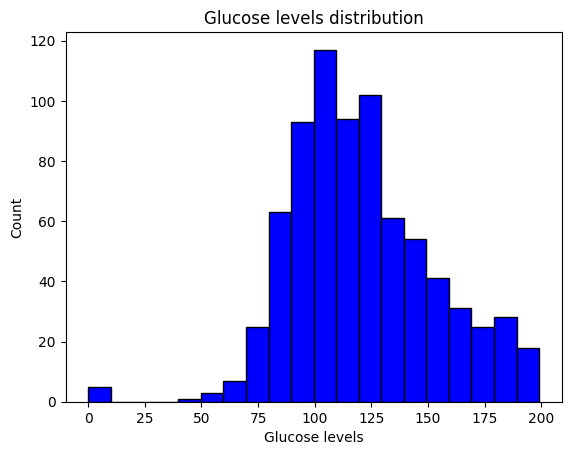

In [62]:

# TODO: Use hist() function to draw a histogram of the glucose column
plt.hist(diabetes['Glucose'], bins=20, color='blue', edgecolor='black')

# TODO: Write a proper title.
plt.title('Glucose levels distribution')

# TODO: Write a proper label for x-axis
plt.xlabel('Glucose levels')

# TODO: Write a proper label for y-axis
plt.ylabel('Count')

# Display the output
plt.show()

**Q14. Answer the follwoing questions in the same cell**

* In which range of glucose readings do you find the highest frequency? Why do yo think it is so?
from 100-125

* What do you think about the minimum Glucose values?
0

* Do you think these are realistic values?
yes as the normal glucose level is between 70-100

* What do we need to do to make the statistics better?
we can can gather more data to limit some of the bias presented

**Q15.  Covariance: One metric to get inituition about the relation between the features in the dataset is covariance matrix. Use `.cov()` function to compute the covariance matrix.**

In [63]:
diabetes.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


**Q16. Comment on the covariance of both Blood pressure, glucose**

Write your observations about the covariance matrix based on what you have learned in the lecture. 

1. Which features/columns tend to be large when the patient is diagnosed by the diabetes?
   - We can see that the Insulin and Glucose levels affect the outcome the most.

2. Discuss the relation between the age and the Insulin values?
   - We can see a strong negative relation between them.

3. Which features/columns might have no or weak relation with the diabetes?
   - DiabetesPedigreeFunction feature contributes the least to the outcome.

**Hint:**
- A "large" positive Cov(x,y) means that x tends to be large when y is large and small when y is small.
- A "large" negative covariance means the opposite, that x tends to be small when y is large and vice versa.
- A value close to zero implies no relationship exists between the variables.

**Q17. Correlation: Although covariance gives you initial impression of the relation between the features and the diabetes, it is critical to conduct correlation analysis to measure the quantative impact of each features on the target (Diabetes). Use `.corr()` function to compute the correlation matrix.**
 

In [64]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Since our objective is to select features that we can use to infer the diabetes statuss of a patient, observe the correlation of the features with respect to the `Outcome` column. `1.0` means the feature has high correlation with the `Outcome`, while values close to `0` refers to no correlation. On the other hand, `-1.0` indicates inverse relationship with the `Outcome`. 

**Correlation Visualization:** For better visualization of the correlaton matrix, you can use heatmap() function from `seaborn` library to generate a heatmap of the matrix.

<Axes: >

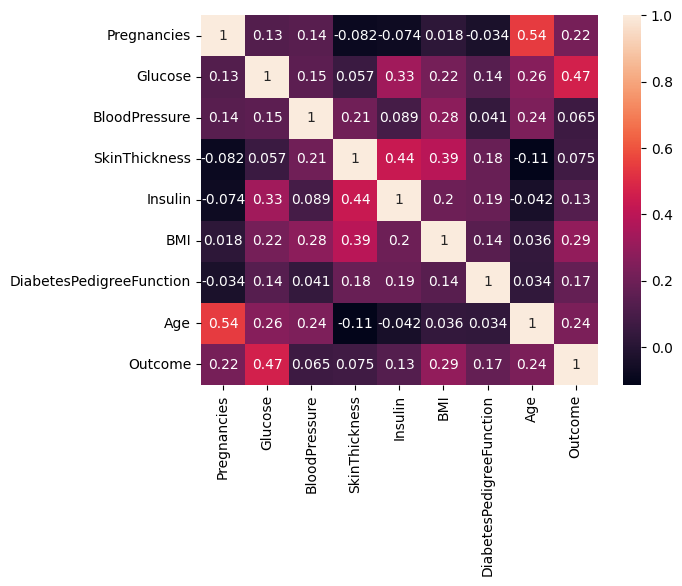

In [65]:
# TODO: Uncomment the following lines.

import seaborn as sns
sns.heatmap(diabetes.corr(), annot=True)

Light color indicates high correlation while dark color indicates no correlation with the outcome.

**Q20.  Given this heatmap, select features that could be used to infer whether the patient has diabetes or not. Write a proper reasoning explaination for each feature you picked. Next, discuss the reason of excluding the other features.**

**A)** Write down features that you have selected. 

Feature: 
- Pregnancies
- Glucose 
- Insulin
- Age
- DiabetesPedigreeFunction

 **B)** Why did you pick them? Write proper explanation.

The all have a correlation with the outcome that's greater than 0 with an acceptable margin.